<a href="https://colab.research.google.com/github/vineeth33/ShoreSecure/blob/main/weatherapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 13.0878,
	"longitude": 80.2785,
	"current": ["temperature_2m", "relative_humidity_2m", "is_day", "rain", "showers", "pressure_msl", "surface_pressure", "wind_speed_10m", "wind_direction_10m"],
	"hourly": ["temperature_2m", "rain", "cloud_cover", "visibility", "wind_speed_10m", "wind_gusts_10m"],
	"daily": ["temperature_2m_max", "sunrise", "sunset", "uv_index_max", "wind_speed_10m_max", "shortwave_radiation_sum"],
	"forecast_days": 14
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_temperature_2m = current.Variables(0).Value()
current_relative_humidity_2m = current.Variables(1).Value()
current_is_day = current.Variables(2).Value()
current_rain = current.Variables(3).Value()
current_showers = current.Variables(4).Value()
current_pressure_msl = current.Variables(5).Value()
current_surface_pressure = current.Variables(6).Value()
current_wind_speed_10m = current.Variables(7).Value()
current_wind_direction_10m = current.Variables(8).Value()

print(f"Current time {current.Time()}")
print(f"Current temperature_2m {current_temperature_2m}")
print(f"Current relative_humidity_2m {current_relative_humidity_2m}")
print(f"Current is_day {current_is_day}")
print(f"Current rain {current_rain}")
print(f"Current showers {current_showers}")
print(f"Current pressure_msl {current_pressure_msl}")
print(f"Current surface_pressure {current_surface_pressure}")
print(f"Current wind_speed_10m {current_wind_speed_10m}")
print(f"Current wind_direction_10m {current_wind_direction_10m}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_rain = hourly.Variables(1).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(2).ValuesAsNumpy()
hourly_visibility = hourly.Variables(3).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(5).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["rain"] = hourly_rain
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["visibility"] = hourly_visibility
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_sunrise = daily.Variables(1).ValuesAsNumpy()
daily_sunset = daily.Variables(2).ValuesAsNumpy()
daily_uv_index_max = daily.Variables(3).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(4).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(5).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["sunrise"] = daily_sunrise
daily_data["sunset"] = daily_sunset
daily_data["uv_index_max"] = daily_uv_index_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 13.0°N 80.125°E
Elevation 15.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Current time 1725535800
Current temperature_2m 33.25
Current relative_humidity_2m 56.0
Current is_day 1.0
Current rain 0.0
Current showers 0.0
Current pressure_msl 1001.7999877929688
Current surface_pressure 1000.126220703125
Current wind_speed_10m 5.804825305938721
Current wind_direction_10m 82.87508392333984
                         date  temperature_2m  rain  cloud_cover  visibility  \
0   2024-09-05 00:00:00+00:00       27.600000   0.0         50.0     24140.0   
1   2024-09-05 01:00:00+00:00       27.549999   0.0        100.0     24140.0   
2   2024-09-05 02:00:00+00:00       28.450001   0.0        100.0     24140.0   
3   2024-09-05 03:00:00+00:00       29.750000   0.0        100.0     24140.0   
4   2024-09-05 04:00:00+00:00       30.650000   0.0        100.0     24140.0   
..                        ...             ...   ...          ...         ...   
331 2024-09-18 19:00:00+00:

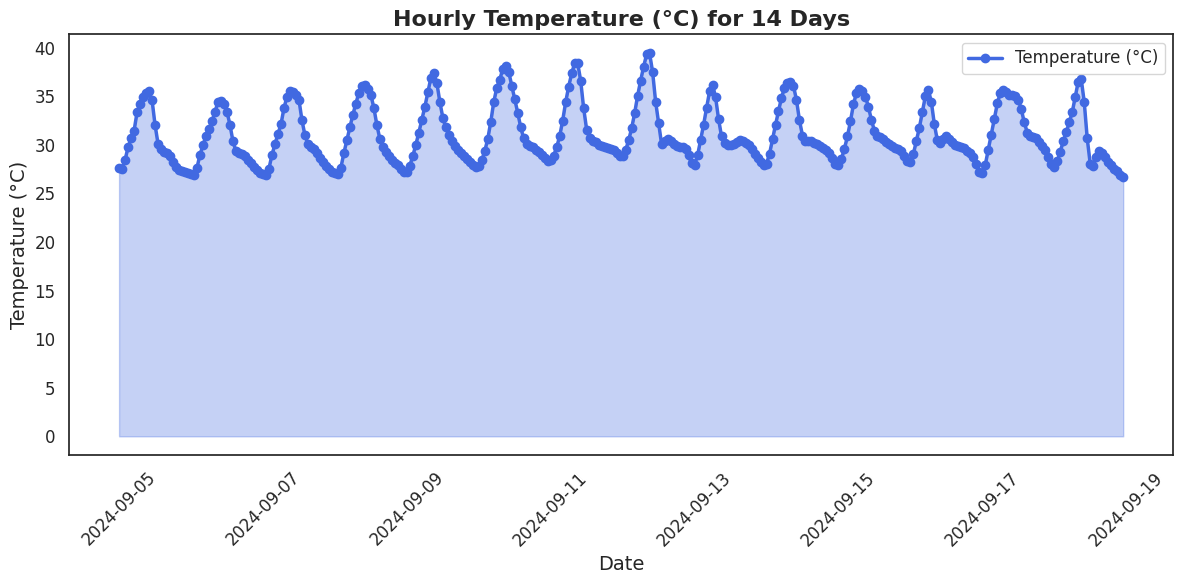

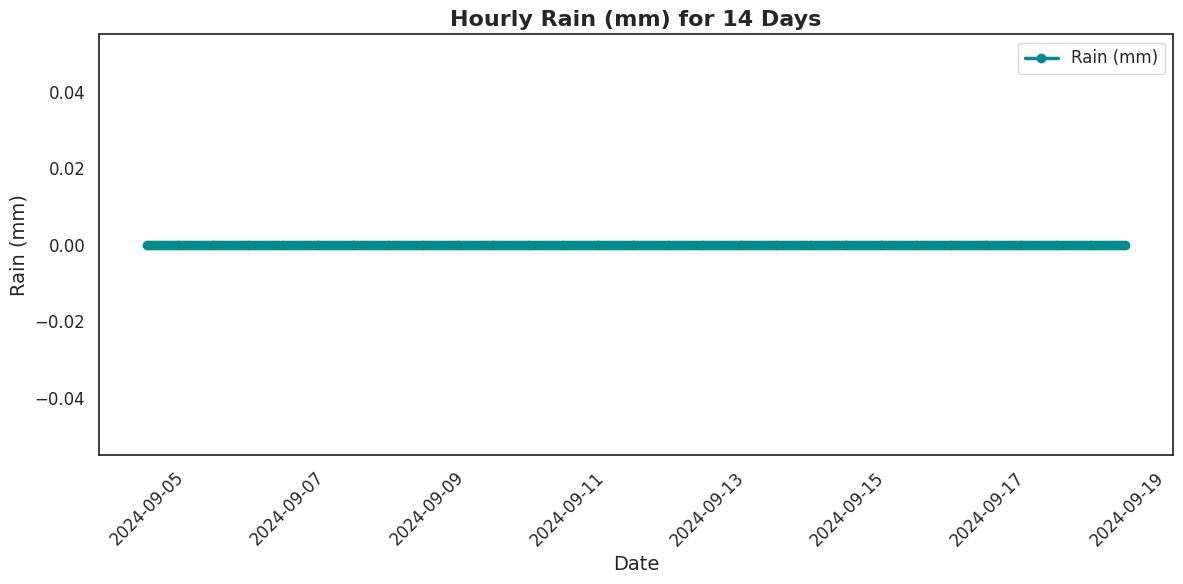

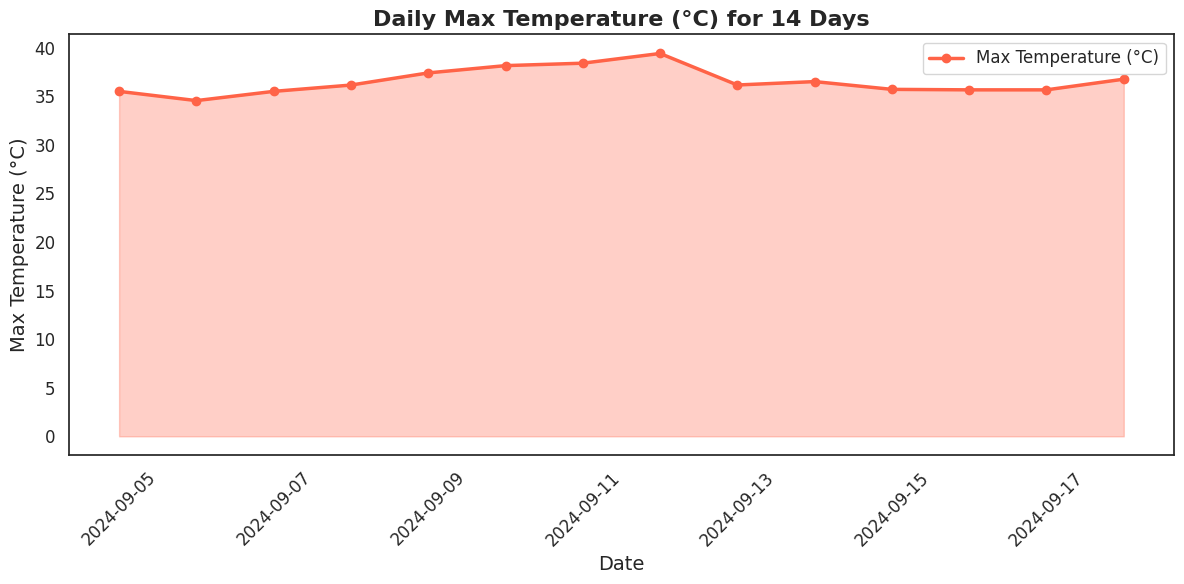

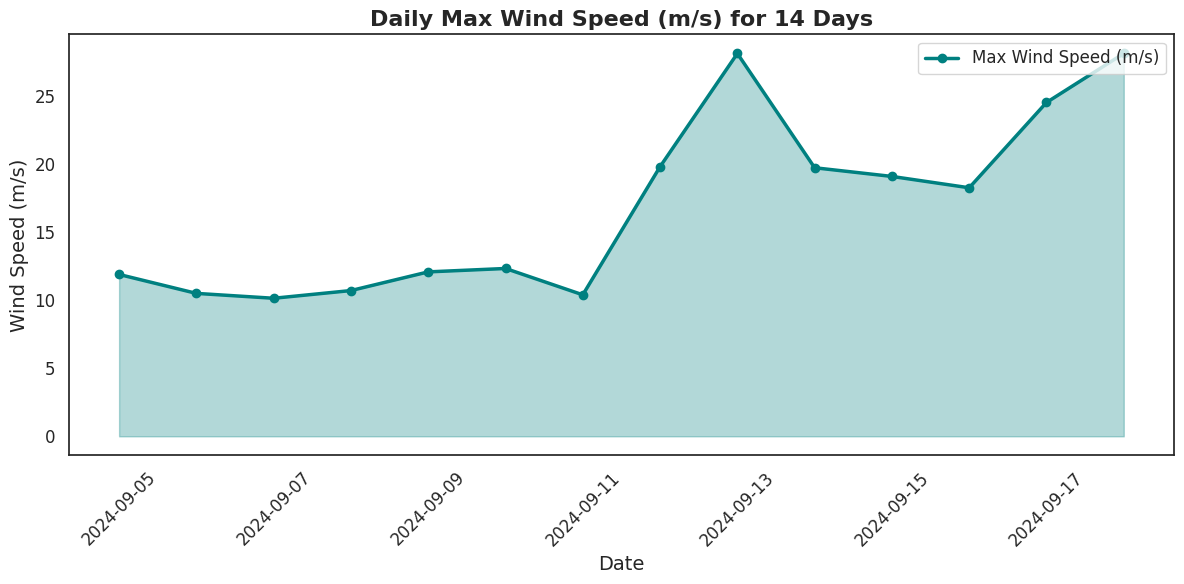

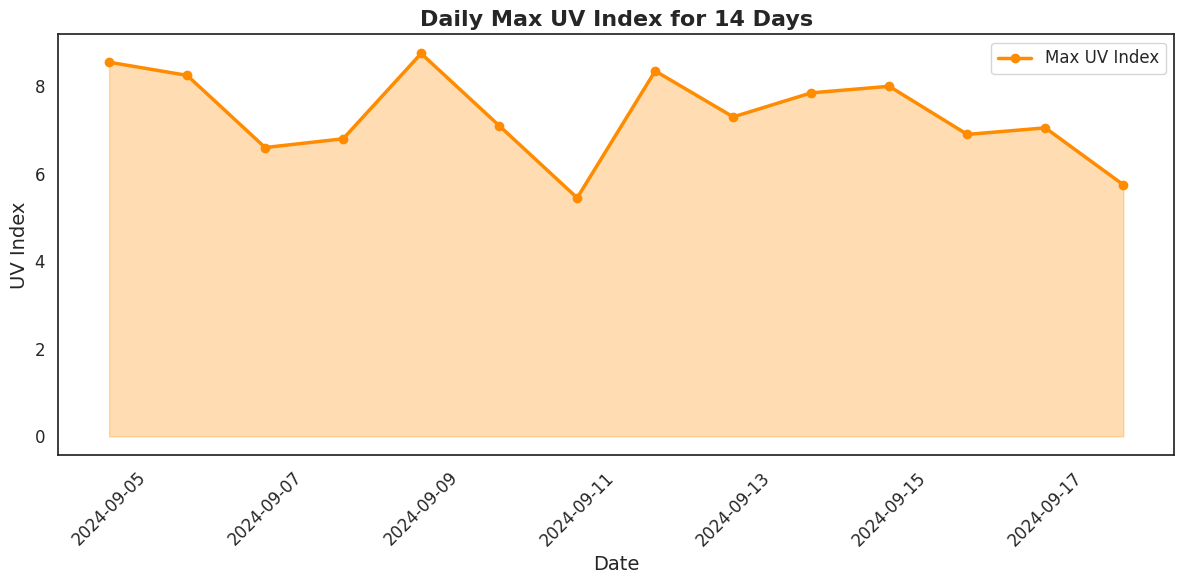

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data frames are already created as 'hourly_dataframe' and 'daily_dataframe'

# Set a style for seaborn
sns.set(style="white")

# Plot hourly temperature
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['temperature_2m'], color='royalblue', label='Temperature (°C)', linewidth=2.5, marker='o')
plt.fill_between(hourly_dataframe['date'], hourly_dataframe['temperature_2m'], color='royalblue', alpha=0.3)
plt.title('Hourly Temperature (°C) for 14 Days', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Plot hourly rain
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['rain'], color='darkcyan', label='Rain (mm)', linewidth=2.5, marker='o')
plt.fill_between(hourly_dataframe['date'], hourly_dataframe['rain'], color='darkcyan', alpha=0.3)
plt.title('Hourly Rain (mm) for 14 Days', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rain (mm)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Plot daily max temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_dataframe['date'], daily_dataframe['temperature_2m_max'], color='tomato', label='Max Temperature (°C)', linewidth=2.5, marker='o')
plt.fill_between(daily_dataframe['date'], daily_dataframe['temperature_2m_max'], color='tomato', alpha=0.3)
plt.title('Daily Max Temperature (°C) for 14 Days', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Max Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Plot daily wind speed
plt.figure(figsize=(12, 6))
plt.plot(daily_dataframe['date'], daily_dataframe['wind_speed_10m_max'], color='teal', label='Max Wind Speed (m/s)', linewidth=2.5, marker='o')
plt.fill_between(daily_dataframe['date'], daily_dataframe['wind_speed_10m_max'], color='teal', alpha=0.3)
plt.title('Daily Max Wind Speed (m/s) for 14 Days', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Plot daily UV index
plt.figure(figsize=(12, 6))
plt.plot(daily_dataframe['date'], daily_dataframe['uv_index_max'], color='darkorange', label='Max UV Index', linewidth=2.5, marker='o')
plt.fill_between(daily_dataframe['date'], daily_dataframe['uv_index_max'], color='darkorange', alpha=0.3)
plt.title('Daily Max UV Index for 14 Days', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('UV Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()
